# **PIMA Indian Diabetes Prediction**

**Problem Statement**

India is considered to be the diabetes capital of the world. Diabetes is one of the primary causes of mortality in India.
Diabetes is a chronic condition in which the body develops a resistance to insulin, a hormone which converts food into glucose. Diabetes affect many people worldwide and is normally divided into Type 1 and Type 2 diabetes.
 * Type-I(insulin-dependent diabetes mellitus (IDDM)):- is a disorder of carbohydrate metabolism due to insufficient insulin secretion which could be hereditary or acquired.
 * Type-II(non-insulin-dependent diabetes mellitus (NIDDM)):- diabetes is a condition in which the sensitivity of body cells to insulin gets reduced.

There are diagnostic tools available in the forms of Random Blood Sugar test, Fasting and PP (Post Prandial) Sugar test, and HbA1C test which is a glycated hemoglobin test. Though these reliable tests are available for years, it becomes very important to spot the disease early as many people might develop it silently especially in the young workforce.


**Objective** 

<br>To predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset using Machine Learning Models.

**Dataset Description**

<br> Pima Indians Diabetes dataset is taken from Kaggle website.
This data has originally come from the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK).

The following features have been provided to help us predict whether a person is diabetic or not:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)2)
* DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
* Age: Age (years)
* Outcome: Class variable (0 if non-diabetic, 1 if diabetic)

**1. Importing the necessery Libraries**

In [1]:
## For data
import pandas as pd # pandas used for data manipulation on dataframe
import numpy as np # numpy used for mathematical operation on array

## For plotting
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
%matplotlib inline

## For Ignoring Warning
import warnings
warnings.filterwarnings("ignore")

## For machine learning
from sklearn.linear_model import LogisticRegression #Importing logistic regression from sklearn

**2. Reading the Dataset**

In [2]:
diabetes = pd.read_csv("diabetes (1).csv")
df=diabetes
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**3. Dataset Description**

In [3]:
# Reading first 5 Rows of the data

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Reading last 5 Rows of the data

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# Taking the sample of the data

df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
272,3,122,78,0,0,23.0,0.254,40,0


In [6]:
# Checking the shape of the data

df.shape

(768, 9)

In [7]:
# Checking the rows of the data

df.shape[0]

768

In [8]:
# Checking the column of the data

df.shape[1]

9

In [9]:
#Displaying the column names

df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#Checking the datatypes of features

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [11]:
#Summary of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
#Outcome variable Distribution

df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [13]:
# check the distribution in per
df['Outcome'].value_counts()/df.shape[0]

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [15]:
#Statistical details of data

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Note:-**

There are a total of 9 variables in this dataset, with a total of 768 observations. "Outcome" is our Target Variable, which has two categories encoded as 0 if non-diabetic, 1 if diabetic, rest all are input features

**4. Data Cleaning and Preparation**

In [16]:
#N unique values
#We'll remove columns with only one unique value because their variance will be 0 and they won't help us anticipate anything.

#Checking the unique value counts in columns
featureValues={}
for d in df.columns.tolist():
    count=df[d].nunique()
    if count==1:
        featureValues[d]=count
# List of columns having same 1 unique value        
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are :n",cols_to_drop)

Columns having 1 unique value are :n []


This signifies that there isn’t any column having only 1 unique value.

In [17]:
# Checking for null values

df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [18]:
#Taking the null values sum

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
# Checking for NA

df.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [20]:
#Taking the sum of na values

df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Although in this dataset none of the columns contain missing values, some of the measurements (Glucose, Blood Pressure, Skin Thickness, Insulin and BMI) have values of 0, which is not possible for a living human organism.

**Counting the number of zeroes in each column**

In [21]:
#Count number of zeros in all columns of Dataframe
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


**Replace Missing Values**

In [22]:
#Replacing the 0's as NaN
df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] =  df[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0, np.NaN)
print(df.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [23]:
#Displaying the top 10 values
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [24]:
#Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    float64
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


There are some missing values.

**Imputation of missing value with median**

In [25]:
median1=df['Pregnancies'].median()
median2=df['Glucose'].median()
median3=df['BloodPressure'].median()
median4=df['SkinThickness'].median()
median5=df['Insulin'].median()
median6=df['BMI'].median()

In [26]:
#Replacing the nan with the median and When inplace = True , the data is modified in place, 
#means the data will be modified without returning a copy of the data or the original data.
df['Pregnancies'].replace(np.nan,median1,inplace=True)
df['Glucose'].replace(np.nan,median2,inplace=True)
df['BloodPressure'].replace(np.nan,median3,inplace=True)
df['SkinThickness'].replace(np.nan,median4,inplace=True)
df['Insulin'].replace(np.nan,median5,inplace=True)
df['BMI'].replace(np.nan,median6,inplace=True)

In [27]:
#Displaying the top 10 values
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8.0,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [28]:
#Summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


There are no null or missing values in our data now

In [29]:
#Checking the datatypes of features

df.dtypes

Pregnancies                 float64
Glucose                     float64
BloodPressure               float64
SkinThickness               float64
Insulin                     float64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [30]:
#Checking for duplicate values

df.loc[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


There are no duplicate values

**5.Exploratory Data Analysis**

[]

<Figure size 1440x1152 with 0 Axes>

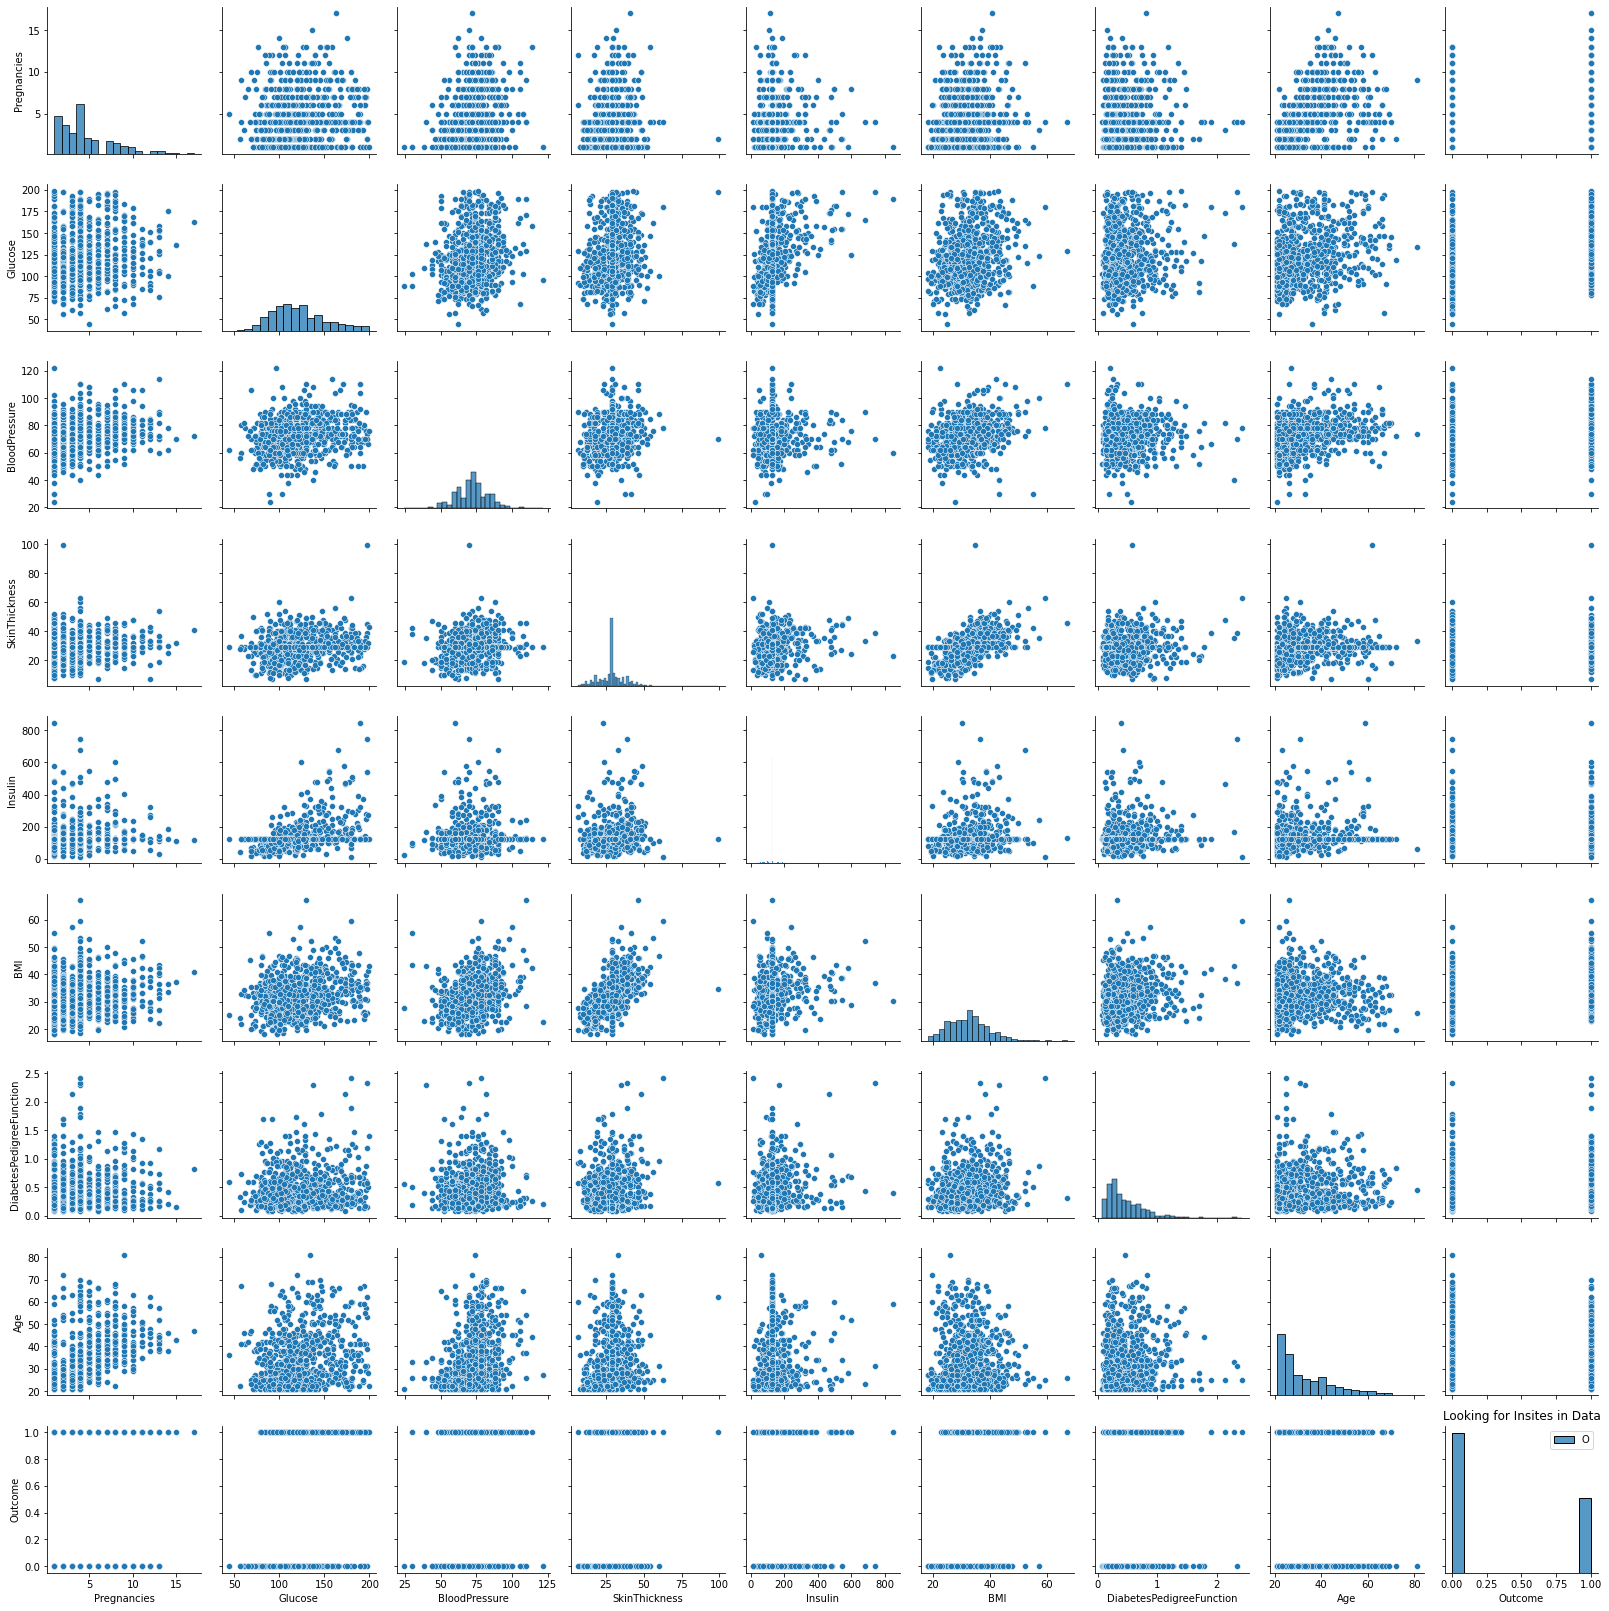

In [31]:
#Pairplot

plt.figure(figsize=(20,16))
sns.pairplot(df)
plt.title("Looking for Insites in Data")
plt.legend("Outcome")
plt.tight_layout()
plt.plot()

**Inference:-**
* pairwise relationships in a dataset
* Here Pregnancies and age are related to each other
* BMI and SkinThickness are related to each other

In [32]:
#Correlation table 
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.153525,0.255967,0.126082,0.032397,0.100870,-0.009198,0.522303,0.248172
Glucose,0.153525,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.255967,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.126082,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.032397,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.100870,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.009198,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.522303,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.248172,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<AxesSubplot:>

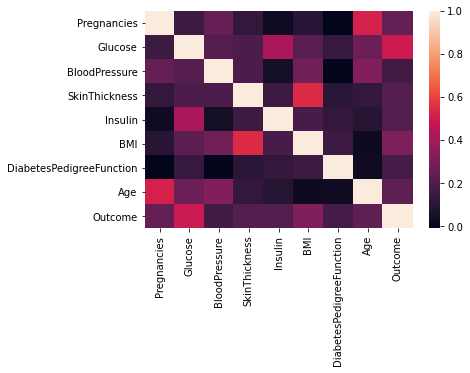

In [33]:
#Heatmap
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

**Inference:-**

* visualize the strength of relationships between numerical variables
* A score closer to 1 or -1 is a positive or negative relationship
* Pregnancies and age has a strong postive correlation with r=0.52
* BMI and SkinThickness has a strong positive correlation with r=0.54
* DiabetesPedigreeFunction and Pregnancies has a strong negative correlation with r=-0.009

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

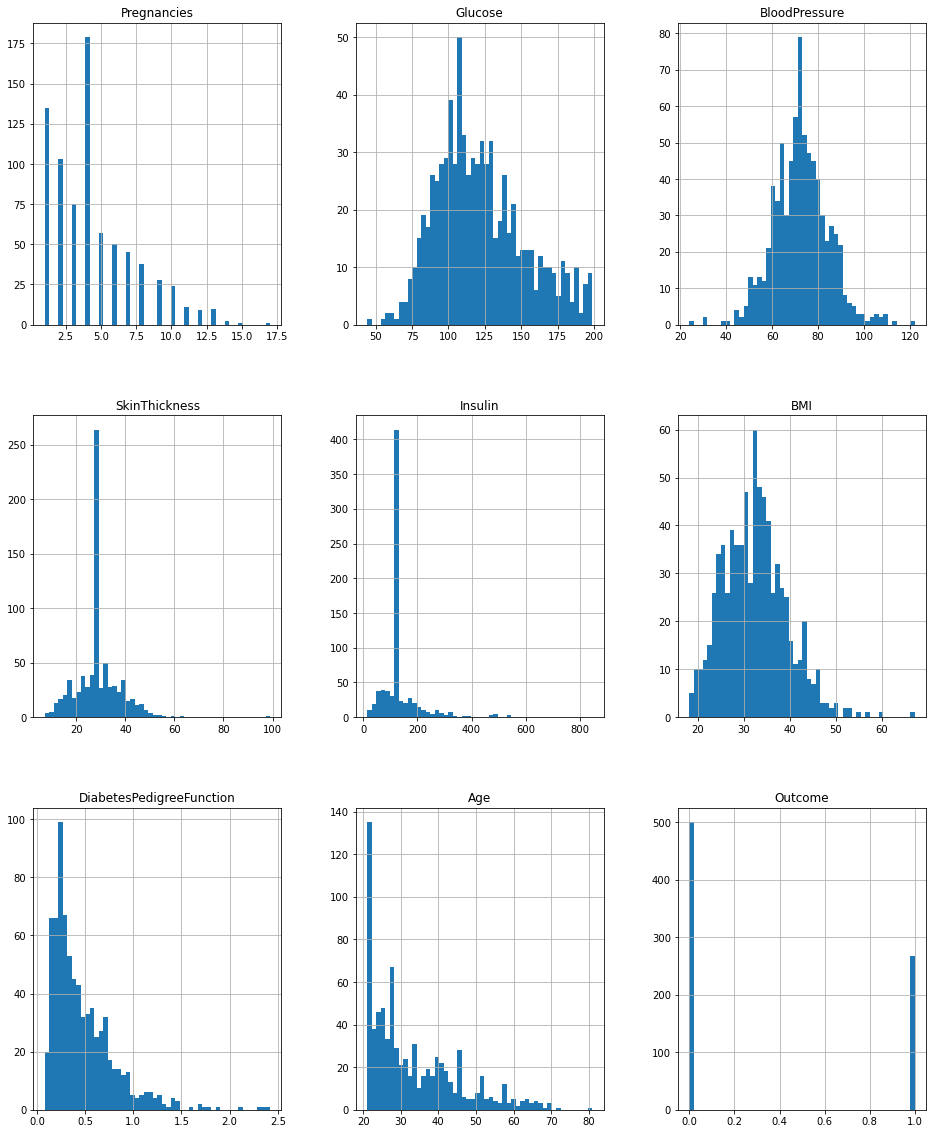

In [34]:
#Histogram
#illustrates the distribution of data for the different columns of the dataset.

df.hist(figsize=(16,20),bins=50) 

**Inference:-**
* visual representation of the distribution of a dataset
* Here pregnencies, glucose, BMI and age are Right-Skewed.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

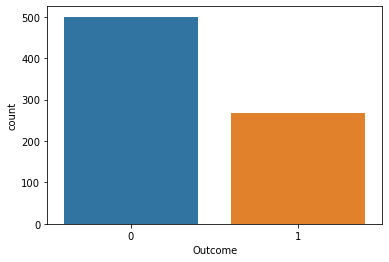

In [35]:
#Count Plot to see the distribution of target variable 
sns.countplot(x='Outcome',data=df)

**Inference:-**
* Class 0 has more count than Class 1

**Checking Outliers**

<AxesSubplot:>

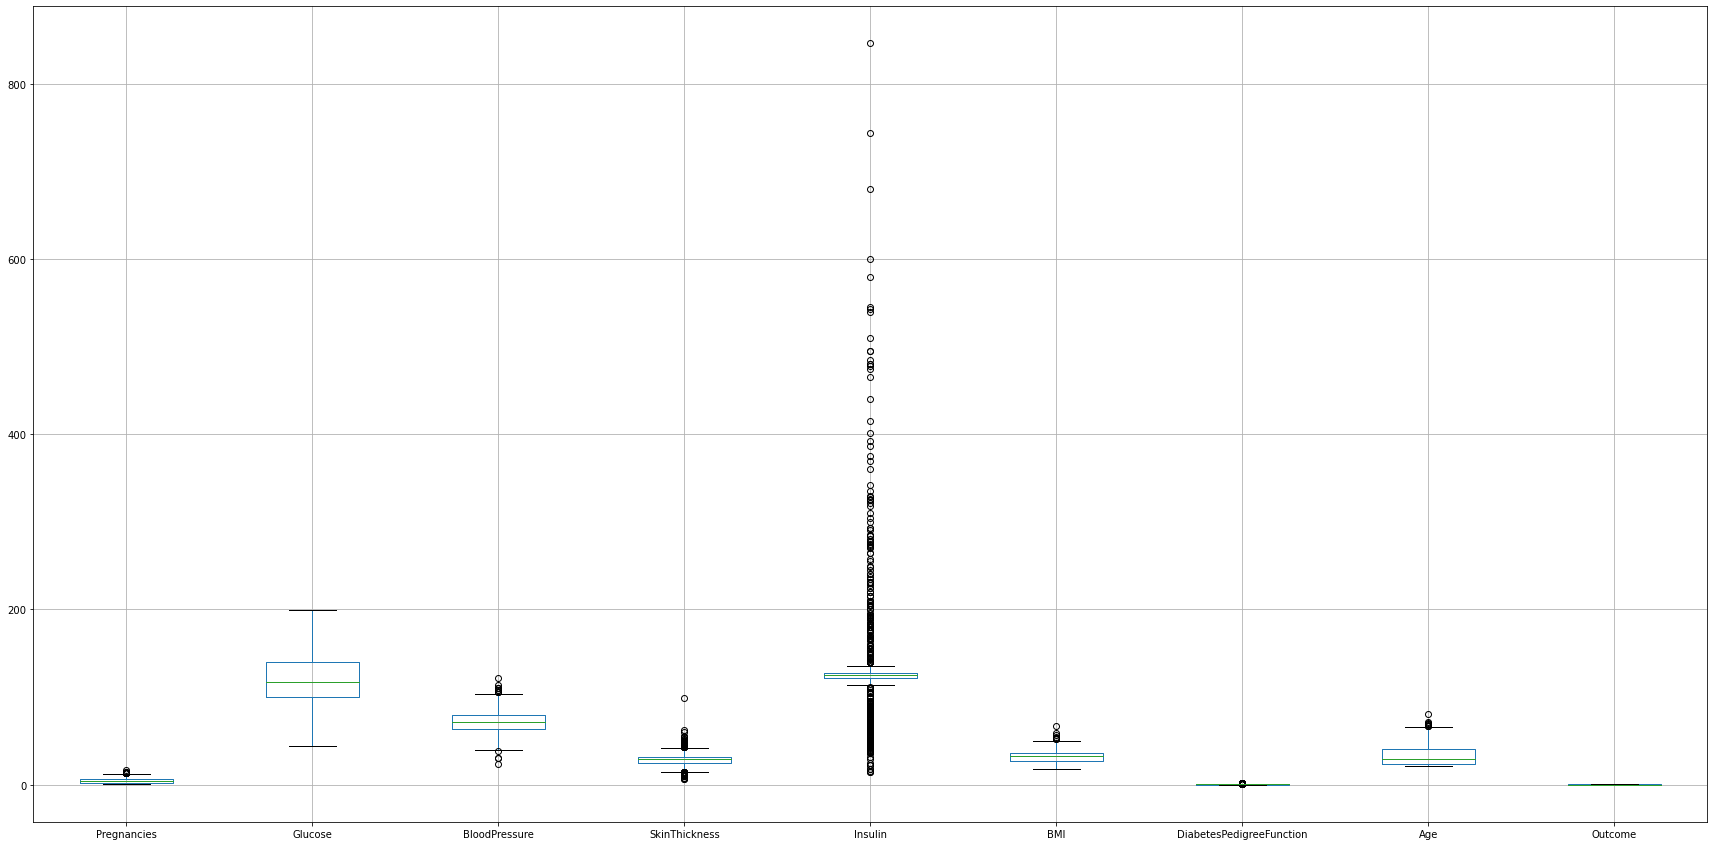

In [36]:
#Boxplot
df.boxplot(figsize=(30,15))

There are outliers present in most of the attributes

In [37]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Pregnancies'>

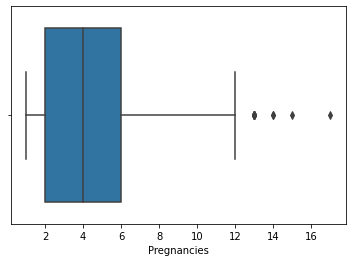

In [38]:
#Visualization using seaborn

sns.boxplot(df['Pregnancies'])

<AxesSubplot:xlabel='Glucose'>

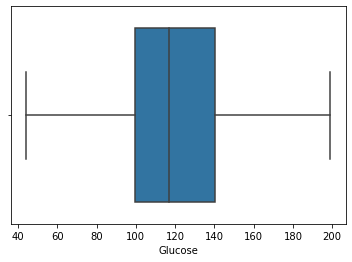

In [39]:
sns.boxplot(df['Glucose'])

<AxesSubplot:xlabel='BloodPressure'>

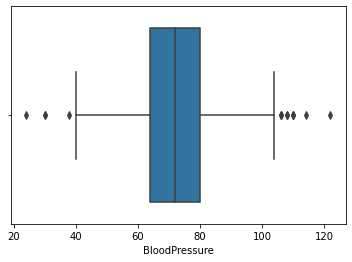

In [40]:
sns.boxplot(df['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness'>

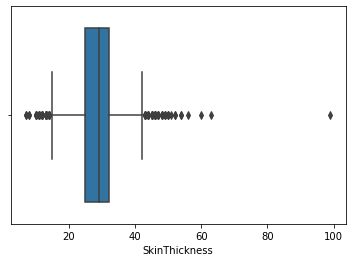

In [41]:
sns.boxplot(df['SkinThickness'])

<AxesSubplot:xlabel='Insulin'>

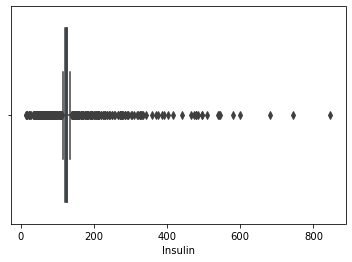

In [42]:
sns.boxplot(df['Insulin'])

<AxesSubplot:xlabel='BMI'>

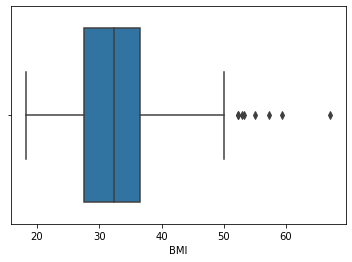

In [43]:
sns.boxplot(df['BMI'])

<AxesSubplot:xlabel='DiabetesPedigreeFunction'>

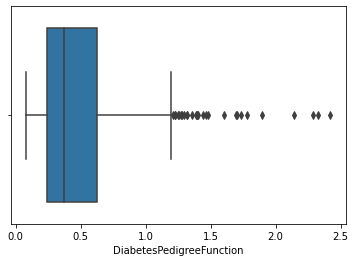

In [44]:
sns.boxplot(df['DiabetesPedigreeFunction'])

<AxesSubplot:xlabel='Age'>

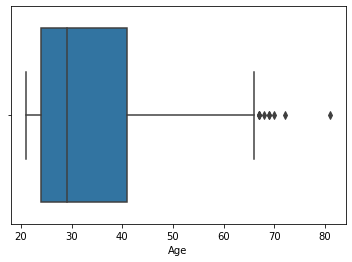

In [45]:
sns.boxplot(df['Age'])

**Outlier Treatment**

In [46]:
#Capping
#the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value
Q1 = np.percentile(df['Pregnancies'],25)
Q2 = np.percentile(df['Pregnancies'],50)
Q3 = np.percentile(df['Pregnancies'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Pregnancies']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Pregnancies'] = np.where(df['Pregnancies']>up_lim, up_lim, df['Pregnancies']) 
df['Pregnancies'] = np.where(df['Pregnancies']<low_lim, low_lim, df['Pregnancies'])
outlier = []
for x in df['Pregnancies']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 2.0
Q2= 4.0
Q3= 6.0
Interquartile range is 4.0
low_limit is -4.0
up_limit is 12.0
outlier in the dataset is [13.0, 13.0, 13.0, 15.0, 17.0, 13.0, 14.0, 13.0, 13.0, 14.0, 13.0, 13.0, 13.0, 13.0]
outlier in the dataset after capping is []


In [47]:
Q1 = np.percentile(df['Glucose'],25)
Q2 = np.percentile(df['Glucose'],50)
Q3 = np.percentile(df['Glucose'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Glucose']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Glucose'] = np.where(df['Glucose']>up_lim, up_lim, df['Glucose']) 
df['Glucose'] = np.where(df['Glucose']<low_lim, low_lim, df['Glucose'])
outlier = []
for x in df['Glucose']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 99.75
Q2= 117.0
Q3= 140.25
Interquartile range is 40.5
low_limit is 39.0
up_limit is 201.0
outlier in the dataset is []
outlier in the dataset after capping is []


In [48]:
Q1 = np.percentile(df['BloodPressure'],25)
Q2 = np.percentile(df['BloodPressure'],50)
Q3 = np.percentile(df['BloodPressure'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['BloodPressure']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['BloodPressure'] = np.where(df['BloodPressure']>up_lim, up_lim, df['BloodPressure']) 
df['BloodPressure'] = np.where(df['BloodPressure']<low_lim, low_lim, df['BloodPressure'])
outlier = []
for x in df['BloodPressure']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 64.0
Q2= 72.0
Q3= 80.0
Interquartile range is 16.0
low_limit is 40.0
up_limit is 104.0
outlier in the dataset is [30.0, 110.0, 108.0, 122.0, 30.0, 110.0, 108.0, 110.0, 24.0, 38.0, 106.0, 106.0, 106.0, 114.0]
outlier in the dataset after capping is []


In [49]:
Q1 = np.percentile(df['SkinThickness'],25)
Q2 = np.percentile(df['SkinThickness'],50)
Q3 = np.percentile(df['SkinThickness'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['SkinThickness']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['SkinThickness'] = np.where(df['SkinThickness']>up_lim, up_lim, df['SkinThickness']) 
df['SkinThickness'] = np.where(df['SkinThickness']<low_lim, low_lim, df['SkinThickness'])
outlier = []
for x in df['SkinThickness']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 25.0
Q2= 29.0
Q3= 32.0
Interquartile range is 7.0
low_limit is 14.5
up_limit is 42.5
outlier in the dataset is [45.0, 47.0, 11.0, 47.0, 11.0, 10.0, 60.0, 13.0, 13.0, 54.0, 51.0, 56.0, 14.0, 13.0, 50.0, 44.0, 12.0, 46.0, 44.0, 13.0, 44.0, 54.0, 14.0, 7.0, 50.0, 52.0, 10.0, 44.0, 43.0, 45.0, 14.0, 10.0, 11.0, 12.0, 43.0, 13.0, 12.0, 48.0, 43.0, 43.0, 8.0, 13.0, 14.0, 12.0, 49.0, 46.0, 46.0, 11.0, 8.0, 12.0, 63.0, 12.0, 45.0, 13.0, 48.0, 13.0, 10.0, 45.0, 7.0, 52.0, 49.0, 43.0, 14.0, 47.0, 99.0, 46.0, 11.0, 50.0, 45.0, 14.0, 13.0, 13.0, 47.0, 12.0, 48.0, 43.0, 46.0, 46.0, 45.0, 10.0, 46.0, 49.0, 11.0, 13.0, 46.0, 44.0, 48.0]
outlier in the dataset after capping is []


In [50]:
Q1 = np.percentile(df['Insulin'],25)
Q2 = np.percentile(df['Insulin'],50)
Q3 = np.percentile(df['Insulin'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Insulin']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Insulin'] = np.where(df['Insulin']>up_lim, up_lim, df['Insulin']) 
df['Insulin'] = np.where(df['Insulin']<low_lim, low_lim, df['Insulin'])
outlier = []
for x in df['Insulin']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 121.5
Q2= 125.0
Q3= 127.25
Interquartile range is 5.75
low_limit is 112.875
up_limit is 135.875
outlier in the dataset is [94.0, 168.0, 88.0, 543.0, 846.0, 175.0, 230.0, 83.0, 96.0, 235.0, 146.0, 140.0, 110.0, 245.0, 54.0, 192.0, 207.0, 70.0, 240.0, 82.0, 36.0, 23.0, 300.0, 342.0, 304.0, 110.0, 142.0, 38.0, 100.0, 90.0, 140.0, 270.0, 71.0, 71.0, 110.0, 176.0, 48.0, 64.0, 228.0, 76.0, 64.0, 220.0, 40.0, 152.0, 140.0, 18.0, 36.0, 495.0, 37.0, 175.0, 51.0, 100.0, 100.0, 99.0, 94.0, 145.0, 168.0, 225.0, 49.0, 140.0, 50.0, 92.0, 325.0, 63.0, 284.0, 204.0, 155.0, 485.0, 94.0, 53.0, 105.0, 285.0, 156.0, 78.0, 48.0, 55.0, 92.0, 23.0, 495.0, 58.0, 160.0, 94.0, 210.0, 48.0, 99.0, 318.0, 44.0, 190.0, 280.0, 87.0, 175.0, 271.0, 478.0, 190.0, 56.0, 32.0, 744.0, 53.0, 370.0, 37.0, 45.0, 192.0, 88.0, 176.0, 194.0, 680.0, 402.0, 55.0, 258.0, 375.0, 150.0, 67.0, 56.0, 45.0, 57.0, 278.0, 155.0, 545.0, 220.0, 49.0, 75.0, 40.0, 74.0, 182.0, 194.0, 360.0, 215.0, 184.0, 42.0, 105.0, 148.0, 180.0, 205.0,

In [51]:
Q1 = np.percentile(df['BMI'],25)
Q2 = np.percentile(df['BMI'],50)
Q3 = np.percentile(df['BMI'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['BMI']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['BMI'] = np.where(df['BMI']>up_lim, up_lim, df['BMI']) 
df['BMI'] = np.where(df['BMI']<low_lim, low_lim, df['BMI'])
outlier = []
for x in df['BMI']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 27.5
Q2= 32.3
Q3= 36.6
Interquartile range is 9.100000000000001
low_limit is 13.849999999999998
up_limit is 50.25
outlier in the dataset is [53.2, 55.0, 67.1, 52.3, 52.3, 52.9, 59.4, 57.3]
outlier in the dataset after capping is []


In [52]:
Q1 = np.percentile(df['DiabetesPedigreeFunction'],25)
Q2 = np.percentile(df['DiabetesPedigreeFunction'],50)
Q3 = np.percentile(df['DiabetesPedigreeFunction'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['DiabetesPedigreeFunction']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']>up_lim, up_lim, df['DiabetesPedigreeFunction']) 
df['DiabetesPedigreeFunction'] = np.where(df['DiabetesPedigreeFunction']<low_lim, low_lim, df['DiabetesPedigreeFunction'])
outlier = []
for x in df['DiabetesPedigreeFunction']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 0.24375
Q2= 0.3725
Q3= 0.62625
Interquartile range is 0.38249999999999995
low_limit is -0.32999999999999996
up_limit is 1.2
outlier in the dataset is [2.288, 1.441, 1.39, 1.893, 1.781, 1.222, 1.4, 1.321, 1.224, 2.329, 1.318, 1.213, 1.353, 1.224, 1.391, 1.476, 2.137, 1.731, 1.268, 1.6, 2.42, 1.251, 1.699, 1.258, 1.282, 1.698, 1.461, 1.292, 1.394]
outlier in the dataset after capping is []


In [53]:
Q1 = np.percentile(df['Age'],25)
Q2 = np.percentile(df['Age'],50)
Q3 = np.percentile(df['Age'],75)
print('Q1=',Q1)
print('Q2=',Q2)
print('Q3=',Q3)
IQR = Q3 - Q1
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is',low_lim)
print('up_limit is',up_lim)
outlier = []
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset is', outlier)
df['Age'] = np.where(df['Age']>up_lim, up_lim, df['Age']) 
df['Age'] = np.where(df['Age']<low_lim, low_lim, df['Age'])
outlier = []
for x in df['Age']:
  if((x > up_lim) or (x < low_lim)):
    outlier.append(x)
print('outlier in the dataset after capping is', outlier)

Q1= 24.0
Q2= 29.0
Q3= 41.0
Interquartile range is 17.0
low_limit is -1.5
up_limit is 66.5
outlier in the dataset is [69, 67, 72, 81, 67, 67, 70, 68, 69]
outlier in the dataset after capping is []


<AxesSubplot:>

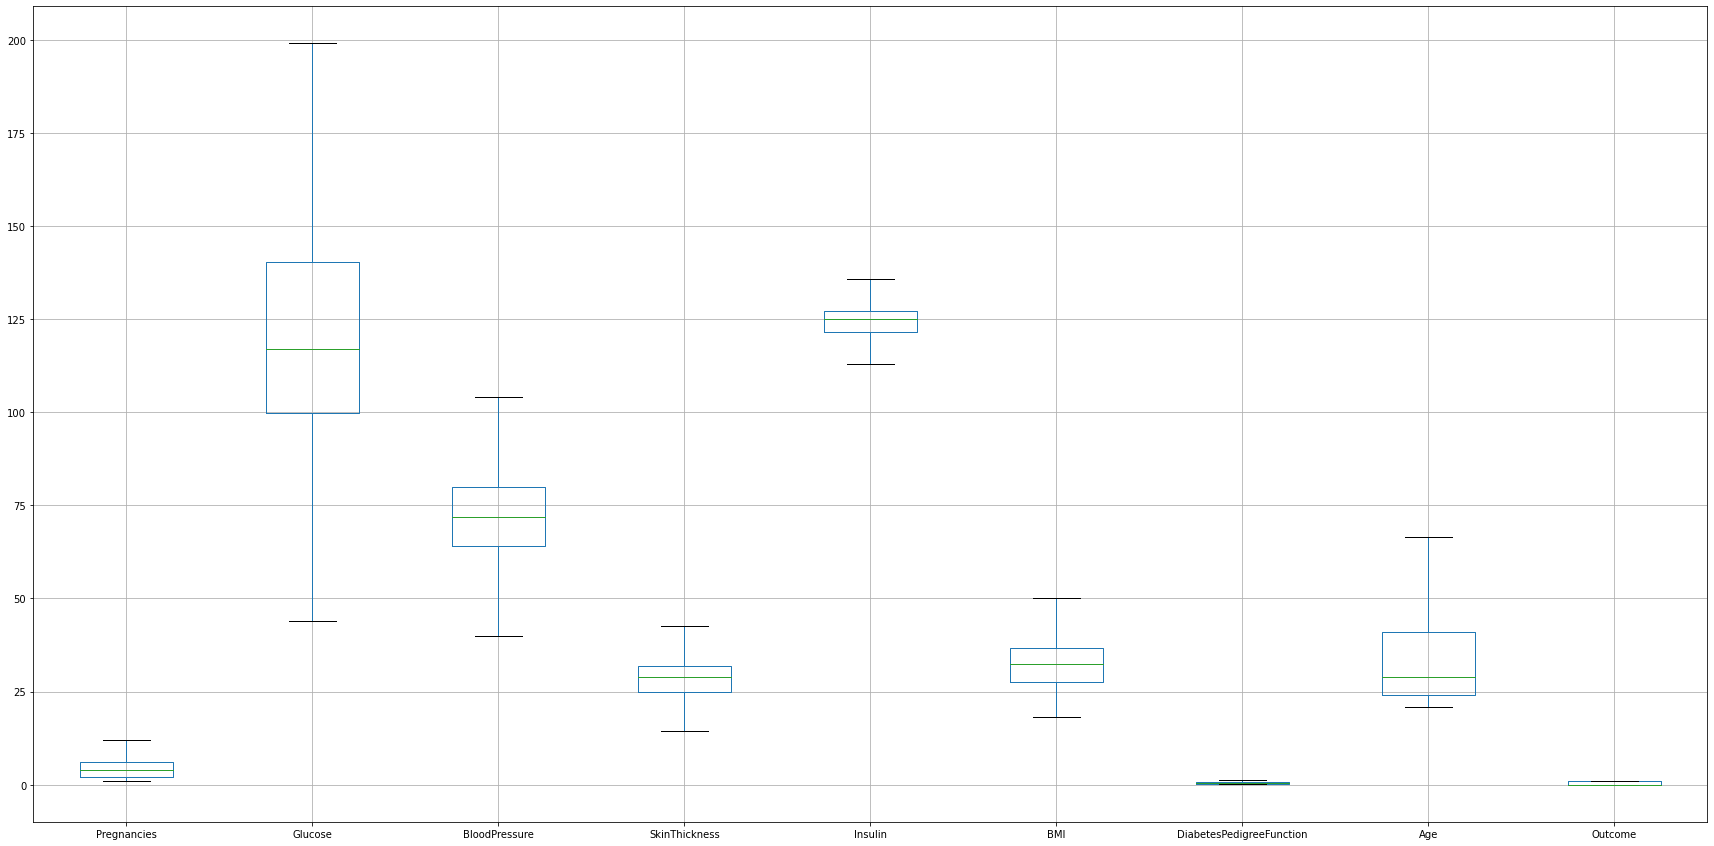

In [54]:
df.boxplot(figsize=(30,15))

The outliers are treated using the capping method.

**6. X and Y splitted data**

In [55]:
#Splitting into independent and dependent variables
X=df.drop(['Outcome'],axis=1)
Y=df['Outcome']

In [56]:
#Displaying the X variable
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0
4,4.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0


In [57]:
#Displaying the Y variable
Y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Splitting the data into training and testing sets**

In [58]:
#Importing train_test_split from sklearn.model_selection

from sklearn.model_selection import train_test_split

In [59]:
#Splitting the data into training and testing set
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.3,random_state=101,stratify=Y)

In [60]:
#Shape of training and testing set
[xtrain.shape,ytrain.shape,xtest.shape,ytest.shape]

[(537, 8), (537,), (231, 8), (231,)]

**Using SMOTE to balance the data**

In [61]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [62]:
X_train_new, y_train_new = sm.fit_resample(xtrain, ytrain.ravel())

<AxesSubplot:>

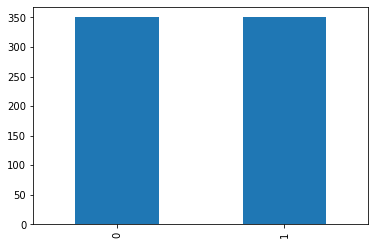

In [63]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

**Model Fitting: Logistic Regression**

In [105]:
# import logistic regression model and accuracy_score metric
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver = 'lbfgs')

# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(xtest)

In [106]:
print('Accuracy score for Training Dataset = ', accuracy_score(y_train_new,train_pred_sm))
print('Accuracy score for Testing Dataset = ', accuracy_score(ytest,test_pred_sm))

Accuracy score for Training Dataset =  0.7385714285714285
Accuracy score for Testing Dataset =  0.7142857142857143


In [107]:
#Classification Report

from sklearn.metrics import classification_report

In [108]:
#Classification Report for training set
print(classification_report(y_train_new,train_pred_sm))

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       350
           1       0.75      0.72      0.73       350

    accuracy                           0.74       700
   macro avg       0.74      0.74      0.74       700
weighted avg       0.74      0.74      0.74       700



In [109]:
#Classification Report for testing set
print(classification_report(ytest,test_pred_sm))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       150
           1       0.58      0.67      0.62        81

    accuracy                           0.71       231
   macro avg       0.69      0.70      0.70       231
weighted avg       0.73      0.71      0.72       231



**Hyperparameter Tuning**

In [115]:
#Grid Search
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
clf = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear','sag','saga']
penalty = ['l1','l2','elasticnet']
c_values = [0.001,0.01,0.1,1,2,3,4,5,6,10,20,30,40,50,100]
max_iter=[100,200,300]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values,max_iter=max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_new, y_train_new)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.766667 using {'C': 3, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


**Using the best parameters**

In [116]:
# prediction for Training data
preds = grid_result.best_estimator_.predict(X_train_new)

In [117]:
#Classification Report for training set
print(classification_report(y_train_new,preds))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       350
           1       0.78      0.76      0.77       350

    accuracy                           0.77       700
   macro avg       0.77      0.77      0.77       700
weighted avg       0.77      0.77      0.77       700



In [118]:
# prediction for Testing data
preds1 = grid_result.best_estimator_.predict(xtest)

In [119]:
#Classification Report for testing set
print(classification_report(ytest,preds1))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       150
           1       0.61      0.65      0.63        81

    accuracy                           0.73       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.73      0.73       231



**Conclusion:**
* The model were trained using machine learning algorithm and evaluated to predict whether a subject's diabetes mellitus diagnosis is positive or not according to eight given attributes.
  * Accuracy :-
* The Training accuracy = (74%)
* The Testing accuracy = (71%)

* **Hyperparameter Tuning**
  * F1-score :-
* Micro avg for training set= 77%
* Micro avg for testing set= 73%